In [1]:
# importamos las librerias necesarias 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

2024-12-21 15:42:03.212756: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 1. Exploración y preprocesamiento de datos:
* Carga y explora el dataset para identificar las variables más relevantes. Las características incluyen información demográfica como la edad, el ingreso, el estado civil, y datos de comportamiento de compra, como la cantidad gastada en diferentes productos.
* Asegúrate de manejar los valores nulos y realizar un preprocesamiento adecuado, como la normalización de los datos para el análisis posterior.

In [2]:
# cargamos el dataset
ruta= '../data/marketing_campaign.csv'
df = pd.read_csv(filepath_or_buffer=ruta, sep='	')
df.shape

(2240, 29)

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.columns # mostramos las columnas de dataset

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

* ID: Es el identificador único de cada cliente.
* Year_Birth: Año de nacimiento del cliente. 
* Education: Nivel educativo del cliente.
* Marital_Status: Estado civil del cliente.
* Income: Ingreso anual del cliente. 
* Kidhome: Número de niños en el hogar del cliente.
* Teenhome: Número de adolescentes en el hogar del cliente.
* Dt_Customer: Fecha de registro del cliente en la base de datos de la empresa.
* Recency: Recencia de la última compra o interacción del cliente con la empresa.
* MntWines: Monto gastado en vino por el cliente. 
* MntFruits: Monto gastado en frutas por el cliente.
* MntMeatProducts: Monto gastado en productos cárnicos por el cliente.
* MntFishProducts: Monto gastado en productos pesqueros por el cliente.
* MntSweetProducts: Monto gastado en productos dulces por el cliente.
* MntGoldProds: Monto gastado en productos de oro por el cliente. 
* NumDealsPurchases: Número de compras realizadas en ofertas. 
* NumWebPurchases: Número de compras realizadas a través de la web.
* NumCatalogPurchases: Número de compras realizadas a través de catálogo.
* NumStorePurchases: Número de compras realizadas en tienda física.
* NumWebVisitsMonth: Número de visitas mensuales del cliente al sitio web de la empresa.

* AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2: Estas columnas indican si el cliente aceptó participar en diferentes campañas de marketing o promociones.

* Complain: Indica si el cliente ha presentado alguna 

* Z_CostContact: Este valor podría estar relacionado con los costos asociados con el contacto o la interacción del cliente con la empresa, como el costo de marketing o atención al cliente.

* Z_Revenue: Ingresos generados a partir de la relación con el cliente.
* Response: Indica si el cliente respondió a una campaña específica. 

In [5]:
df.describe().T # mostramos la estadistica descriptiva

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [6]:
# verificar si hay columnas que tienen valores nulos
df_isnull = df.isnull().sum()
columnas_nulas = df_isnull[df_isnull > 0]
columnas_nulas

Income    24
dtype: int64

In [7]:
# imputar con la media
df['Income'].fillna(df['Income'].mean(), inplace=True)


/tmp/ipykernel_59725/1032561781.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].mean(), inplace=True)


In [8]:
# seleccionar columnas numéricas para normalizar
numerical_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
# creamos un objeto 'scaler' para estandarizar los datos numéricos
scaler = StandardScaler()
# aplicamos la estandarización a las columnas numéricas seleccionadas
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [9]:
# seleccionamos las columnas de tipo 'object' (categóricas) del DataFrame
object_cols = df.select_dtypes(include=['object']).columns.tolist()
# aplicamos la codificación one-hot a las columnas categóricas seleccionadas, 
df = pd.get_dummies(df, columns=object_cols, drop_first=True)


In [10]:
# creamos un objeto 'scaler' para estandarizar los datos
scaler = StandardScaler()
# seleccionamos las columnas correspondientes a los sensores (excluyendo 'subject' y 'Activity')
sensor_columns = df.columns[:-2]  # las últimas columnas son 'subject' y 'Activity'
# aplicamos la estandarización a las columnas de los sensores
df[sensor_columns] = scaler.fit_transform(df[sensor_columns])
# mostramos un resumen estadístico de los datos después de la estandarización
print(df.describe())

                 ID    Year_Birth        Income       Kidhome      Teenhome  \
count  2.240000e+03  2.240000e+03  2.240000e+03  2.240000e+03  2.240000e+03   
mean   2.220446e-17  2.220446e-17  2.854859e-17 -8.088768e-17 -3.172066e-18   
std    1.000223e+00  1.000223e+00  1.000223e+00  1.000223e+00  1.000223e+00   
min   -1.722818e+00 -6.326960e+00 -2.018090e+00 -8.252176e-01 -9.298944e-01   
25%   -8.514982e-01 -8.184192e-01 -6.674801e-01 -8.252176e-01 -9.298944e-01   
50%   -4.117757e-02  9.967091e-02 -2.020403e-02 -8.252176e-01 -9.298944e-01   
75%    8.735813e-01  6.839101e-01  6.408743e-01  1.032559e+00  9.069340e-01   
max    1.724876e+00  2.269702e+00  2.454513e+01  2.890335e+00  2.743762e+00   

            Recency      MntWines     MntFruits  MntMeatProducts  \
count  2.240000e+03  2.240000e+03  2.240000e+03     2.240000e+03   
mean  -3.172066e-18  1.903239e-17 -1.744636e-17     2.537653e-17   
std    1.000223e+00  1.000223e+00  1.000223e+00     1.000223e+00   
min   -1.696001e

In [11]:
# Separación de variables dependientes e independientes
X = df.drop(['Response'], axis=1)  # Variables independientes
y = df['Response']  # Variable dependiente
# División del conjunto de datos en entrenamiento y prueba (80-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Análisis no supervisado:
* Selecciona un enfoque de análisis no supervisado: K-means o PCA.
* K-means: Si seleccionas K-means, determina el número óptimo de clusters utilizando el método del codo o el silhouette score. Agrupa a los clientes en diferentes clusters y analiza cómo se dividen según sus características demográficas y de compra.
* PCA: Si eliges PCA, realiza una reducción de dimensionalidad para capturar al menos el 90% de la varianza explicada. Proyecta los datos en los primeros componentes principales y visualiza cómo se agrupan los clientes en el nuevo espacio de características.

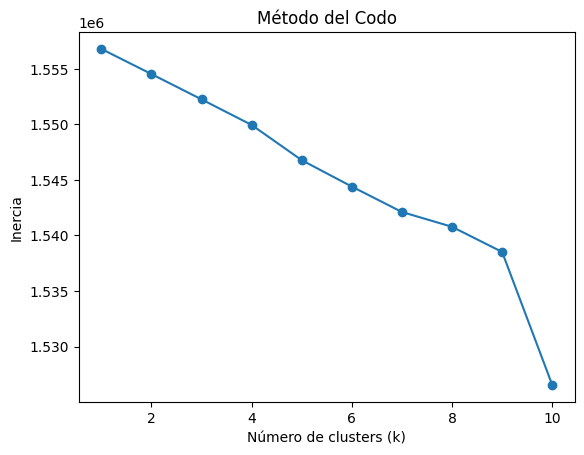

In [12]:
# inicializamos una lista vacía para almacenar los valores de inercia
inertia = []
# iteramos sobre diferentes valores de k (de 1 a 10)
for k in range(1, 11):
    # creamos un modelo KMeans con k clusters y un valor fijo para la aleatoriedad
    kmeans = KMeans(n_clusters=k, random_state=42)
    # ajustamos el modelo KMeans a los datos (sensor_columns) para encontrar los clusters
    kmeans.fit(df[sensor_columns])
    # agregamos la inercia (suma de distancias cuadradas de los puntos a sus centroides) a la lista inertia
    inertia.append(kmeans.inertia_)

# creamos un gráfico de línea para visualizar la inercia en función del número de clusters
plt.plot(range(1, 11), inertia, marker='o')
# añadimos etiquetas a los ejes
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
# añadimos un título al gráfico
plt.title('Método del Codo')
# mostramos el gráfico
plt.show()

* La inercia disminuye con el aumento de k, lo cual es esperado.
* El número óptimo de clusters se visualiza mejor en 6.

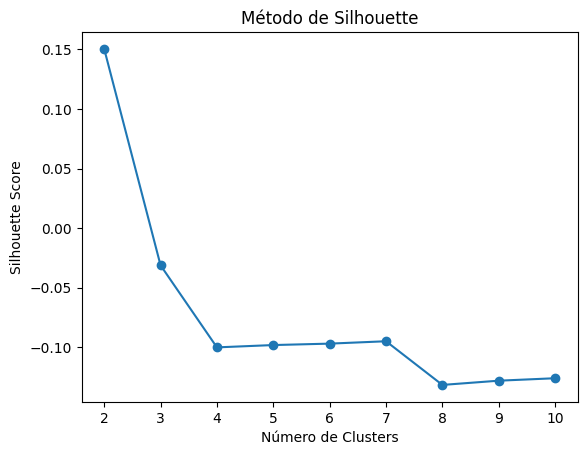

In [13]:
# creamos una lista vacía para almacenar los valores del silhouette score
silhouette_scores = []
# comenzamos un ciclo para probar diferentes números de clusters (de 2 a 10)
for k in range(2, 11):
    # creamos un modelo KMeans con el número actual de clusters
    kmeans = KMeans(n_clusters=k, random_state=42)  
    # ajustamos el modelo a los datos de entrenamiento (X_train)
    kmeans.fit(X_train)
    # calculamos el silhouette score para las etiquetas obtenidas por KMeans
    score = silhouette_score(X_train, kmeans.labels_)
    # almacenamos el score en la lista silhouette_scores
    silhouette_scores.append(score)

# graficamos el silhouette score en función del número de clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
# etiquetamos el eje X (número de clusters)
plt.xlabel('Número de Clusters')
# etiquetamos el eje Y (silhouette score)
plt.ylabel('Silhouette Score')
# añadimos un título al gráfico
plt.title('Método de Silhouette')
# mostramos el gráfico
plt.show()

* El mejor valor de silhouette score está en k=6.
* Es posible que no sea el modelo más adecuado para este caso.

In [14]:
# asignamos el número óptimo de clusters basado en el análisis previo (Silhouette Score)
optimal_k = 6
# creamos un modelo KMeans con el número óptimo de clusters (6) y un estado aleatorio fijo para reproducibilidad
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# aplicamos el modelo KMeans a los datos numéricos y asignamos cada fila a un cluster
df['Cluster'] = kmeans.fit_predict(df[numerical_cols])
# mostramos el promedio de las características numéricas por cada cluster
print(df.groupby('Cluster').mean())

               ID  Year_Birth    Income   Kidhome  Teenhome   Recency  \
Cluster                                                                 
0       -0.050547   -0.418379  0.165416 -0.340580  0.830266 -0.036931   
1        0.047844   -0.050946  0.767603 -0.718449 -0.406293  0.020358   
2       -0.059449    0.030236  1.118429 -0.715937 -0.713797 -0.023221   
3        0.014464    0.273664 -0.714686  0.684226 -0.155908  0.009208   
4        0.054570   -0.119770  1.396788 -0.720848 -0.640955  0.072666   
5       -0.129267   -0.056126  0.751335 -0.701366 -0.133935 -0.015289   

         MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
Cluster                                                         ...   
0        0.351880  -0.212590        -0.211998        -0.236689  ...   
1        0.525988   1.127992         1.063643         1.133727  ...   
2        1.356826   0.920340         1.388946         1.222801  ...   
3       -0.793090  -0.539309        -0.641681        -0.5605

/tmp/ipykernel_59725/3652977922.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Cluster'] = kmeans.fit_predict(df[numerical_cols])


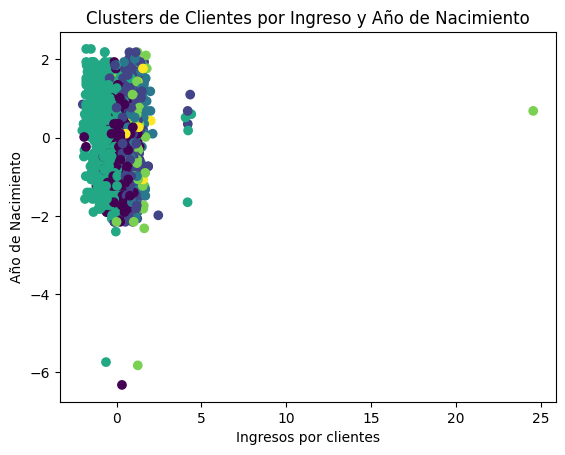

In [15]:
# seleccionamos dos características numéricas para el gráfico de dispersión
plt.scatter(df['Income'], df['Year_Birth'], c=df['Cluster'], cmap='viridis')
# añadimos etiquetas a los ejes X e Y para las características seleccionadas
plt.xlabel('Ingresos por clientes')
plt.ylabel('Año de Nacimiento')
# establecemos el título del gráfico
plt.title('Clusters de Clientes por Ingreso y Año de Nacimiento')
# mostramos el gráfico
plt.show()

* En el gráfico observamos que las actividades se centran mas hacia el punto cero

In [16]:
# Definir el modelo MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', max_iter=500, random_state=42)
# Entrenar el modelo
mlp.fit(X_train, y_train)
# Predecir sobre el conjunto de prueba
y_pred = mlp.predict(X_test)
# Evaluación del modelo
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

Mean Squared Error: 1.186234078447923
R-squared: -0.155078366833026


* El modelo no está haciendo un buen trabajo según estos resultados, no es el mas apropiado para el caso.

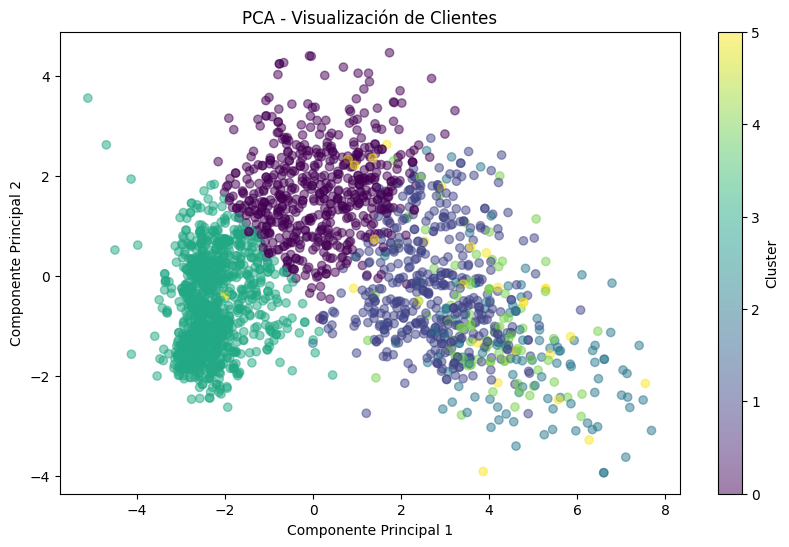

In [17]:
# realizamos un análisis de componentes principales (PCA) reduciendo a 2 componentes principales
pca = PCA(n_components=2)
# aplicamos el PCA a los datos numéricos para reducir la dimensionalidad a 2 componentes
principal_components = pca.fit_transform(df[numerical_cols])
# creamos un DataFrame con los dos componentes principales y les damos nombres 
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
# agregamos la columna 'Cluster' del DataFrame original para poder visualizar los clusters
pca_df['Cluster'] = df['Cluster']

# configuramos el tamaño de la figura para la visualización
plt.figure(figsize=(10, 6))
# generamos un gráfico de dispersión de los dos componentes principales, coloreando por el cluster
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.5)
# agregamos etiquetas a los ejes X e Y
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
# agregamos un título al gráfico
plt.title('PCA - Visualización de Clientes')
# mostramos una barra de colores para indicar a qué cluster corresponde cada punto
plt.colorbar(label='Cluster')
# mostramos el gráfico
plt.show()


* Se vizuliza la agrupacion de los datos, pero la distribucion no es homogenea
* Las actividades se agrupan pero estan mezcladas en algunos sectores

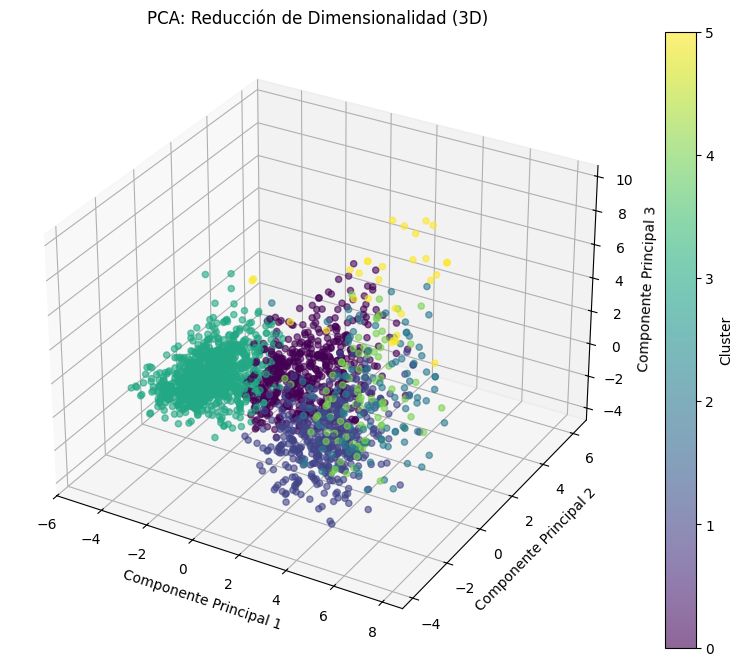

In [18]:
# aplicamos PCA con 3 componentes principales para reducir la dimensionalidad de los datos
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(df[sensor_columns])
# creamos un DataFrame con los tres primeros componentes principales
data_pca_3d = pd.DataFrame(data=principal_components_3d, columns=['PC1', 'PC2', 'PC3'])
# creamos una figura para el gráfico 3D con un tamaño de 10x8
fig = plt.figure(figsize=(10, 8))
# añadimos un subplot 3D a la figura
ax = fig.add_subplot(111, projection='3d')
# creamos un gráfico de dispersión 3D donde las coordenadas de los puntos son los tres componentes principales
scatter = ax.scatter(data_pca_3d['PC1'], data_pca_3d['PC2'], data_pca_3d['PC3'], c=df['Cluster'], cmap='viridis', alpha=0.6)
# añadimos etiquetas a los ejes X, Y y Z para los tres componentes principales
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
# establecemos el título del gráfico
ax.set_title('PCA: Reducción de Dimensionalidad (3D)')
# añadimos una barra de colores que indica el cluster correspondiente a cada punto
fig.colorbar(scatter, label='Cluster')
# mostramos el gráfico
plt.show()

* En el gráfico 3D observamos que los compontenes se agrupan más hacia el punto cero

## 3. Modelado con MLP:
* Implementa un Perceptrón Multicapa (MLP) para predecir las compras futuras de los clientes o su probabilidad de realizar una compra en una categoría específica de productos.
* Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de tener una proporción adecuada de cada clase en el conjunto de datos.
* Discute la arquitectura de tu MLP, incluyendo el número de capas ocultas, el número de neuronas en cada capa, y las funciones de activación utilizadas.

In [19]:
sensor_columns = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 
                  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']  # ajusta esto según tus datos
#selección de la columna objetivo
y_column = 'Cluster'
# codificamos las etiquetas de 'Cluster' de manera numérica
le = LabelEncoder()
y = le.fit_transform(df[y_column])
# normalizamos los datos de las columnas de los sensores para que todos tengan la misma escala
scaler = StandardScaler()
X = scaler.fit_transform(df[sensor_columns])
# dividimos los datos en dos conjuntos: uno para entrenar el modelo y otro para probarlo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# creamos un modelo secuencial vacío, al que vamos a añadir capas
model = Sequential()
# añadimos la primera capa densa (fully connected) con 128 neuronas y activación ReLU
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
# añadimos una segunda capa densa con 64 neuronas y activación ReLU
model.add(Dense(64, activation='relu'))
# añadimos la capa de salida con un número de neuronas igual al número de clases en 'Activity'
# la activación 'softmax' asegura que la salida será una distribución de probabilidades
model.add(Dense(len(np.unique(y)), activation='softmax'))  # número de clases en 'Activity'
# compilamos el modelo, especificando la función de pérdida, el optimizador y las métricas a evaluar
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# entrenamos el modelo con los datos de entrenamiento, usando un 20% para validación, durante 50 épocas
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

/home/cvelazquez/anaconda3/envs/ds_mitic/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5545 - loss: 1.3754 - val_accuracy: 0.7521 - val_loss: 0.7639
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8179 - loss: 0.5562 - val_accuracy: 0.7688 - val_loss: 0.6263
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8104 - loss: 0.5429 - val_accuracy: 0.7911 - val_loss: 0.6041
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8367 - loss: 0.4941 - val_accuracy: 0.8217 - val_loss: 0.5504
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8416 - loss: 0.4268 - val_accuracy: 0.8301 - val_loss: 0.5286
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8478 - loss: 0.4152 - val_accuracy: 0.8217 - val_loss: 0.5111
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8592 - loss: 0.4091 - val_accuracy: 0.8217 - val_loss: 0.5283
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8662 - loss: 0.3932 - val_accuracy: 0.8217 - val_loss:

## 4. Evaluación del modelo:
* Evalúa el modelo MLP utilizando métricas de clasificación como la precisión, el recall, el F1-score y la matriz de confusión. Asegúrate de comparar estas métricas entre el conjunto de entrenamiento y el conjunto de prueba para identificar cualquier posible sobreajuste.
* Visualiza las curvas de aprendizaje que muestren la pérdida y la precisión a lo largo del entrenamiento.

In [20]:
# usamos el modelo entrenado para hacer predicciones sobre el conjunto de prueba (X_test)
y_pred = model.predict(X_test)
# obtenemos la clase predicha para cada muestra, tomando el índice con la mayor probabilidad
y_pred_classes = y_pred.argmax(axis=1)
# imprimimos el reporte de clasificación, que muestra varias métricas de evaluación
print(classification_report(y_test, y_pred_classes))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       115
           1       0.75      0.83      0.79        87
           2       0.33      0.33      0.33        24
           3       0.97      0.98      0.98       198
           4       0.33      0.17      0.22        18
           5       0.50      0.17      0.25         6

    accuracy                           0.86       448
   macro avg       0.63      0.57      0.58       448
weighted avg       0.85      0.86      0.85       448



* Segùn los resultados, el modelo tiene resultados muy diversos para las disintas clases.
* La precicion es de 86%, el macro promedio de 54% y el peso promedio del 84%.

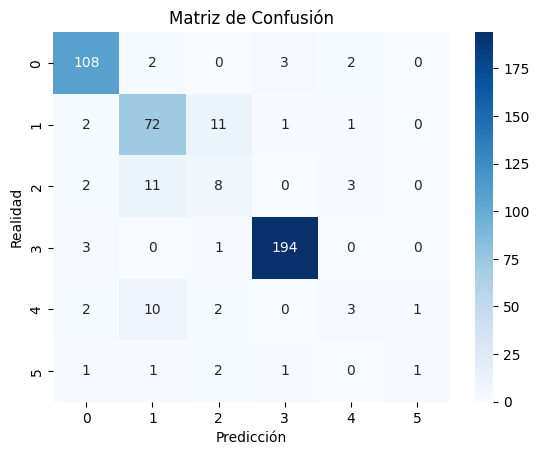

In [21]:
# calculamos la matriz de confusión comparando las etiquetas reales (y_test) con las predicciones (y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
# usamos un mapa de calor (heatmap) para visualizar la matriz de confusión, con los valores numéricos anotados en cada celda
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# configuramos las etiquetas del eje X (Predicción) y el eje Y (Realidad) para la gráfica
plt.xlabel('Predicción')
plt.ylabel('Realidad')
# le damos un título a la gráfica
plt.title('Matriz de Confusión')
# mostramos la gráfica generada
plt.show()

* El modelo tiene un buen desempeño en algunas clases, pero muestra serias dificultades en otras.

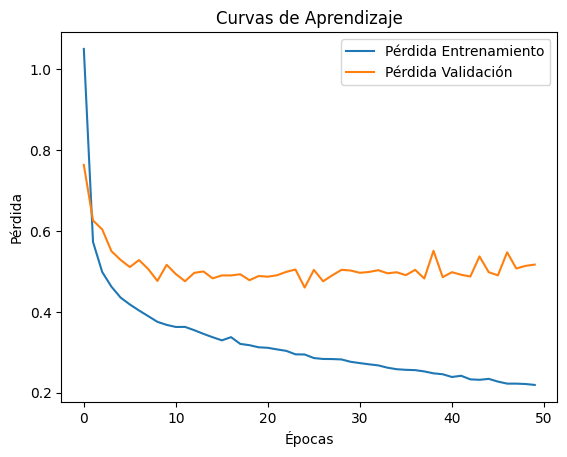

In [22]:
# trazamos la curva de la pérdida durante el entrenamiento usando los valores de 'loss' registrados en el historial de entrenamiento
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
# trazamos la curva de la pérdida en el conjunto de validación usando los valores de 'val_loss' registrados en el historial de validación
plt.plot(history.history['val_loss'], label='Pérdida Validación')
# le damos un título a la gráfica para describirla
plt.title('Curvas de Aprendizaje')
# configuramos la etiqueta del eje X para mostrar el número de épocas
plt.xlabel('Épocas')
# configuramos la etiqueta del eje Y para mostrar el valor de la pérdida
plt.ylabel('Pérdida')
# agregamos una leyenda para identificar las curvas de entrenamiento y validación
plt.legend()
# mostramos la gráfica generada
plt.show()

* Una disminución consistente tanto en el conjunto de entrenamiento como en el conjunto de validación a lo largo de las épocas, lo que sugiere que el modelo está aprendiendo correctamente y mejorando su capacidad de predicción.
* La pérdida de entrenamiento disminuye gradualmente, el modelo está ajustando bien sus parámetros y minimizando el error en los datos de entrenamiento.

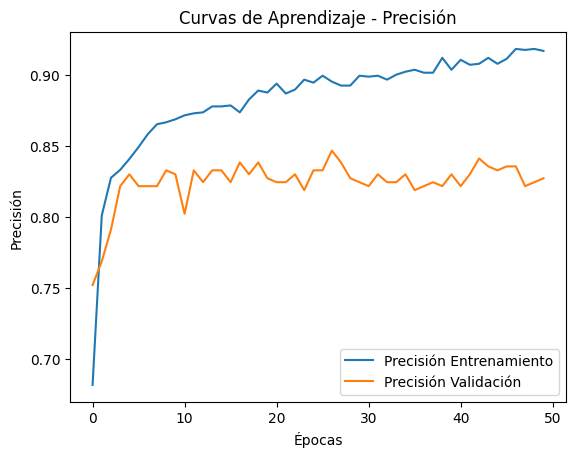

In [23]:
# trazamos la curva de la precisión durante el entrenamiento usando los valores de 'accuracy' registrados en el historial de entrenamiento
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
# trazamos la curva de la precisión en el conjunto de validación usando los valores de 'val_accuracy' registrados en el historial de validación
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
# le damos un título a la gráfica para describirla
plt.title('Curvas de Aprendizaje - Precisión')
# configuramos la etiqueta del eje X para mostrar el número de épocas
plt.xlabel('Épocas')
# configuramos la etiqueta del eje Y para mostrar el valor de la precisión
plt.ylabel('Precisión')
# agregamos una leyenda para identificar las curvas de entrenamiento y validación
plt.legend()
# mostramos la gráfica generada
plt.show()

* En los datos de entrenamiento como en los de validación, el modelo ha mejorado de manera constante a lo largo de las épocas
* Podemos notar algunas fluctuaciones en la precisión de validación a lo largo de las épocas.
* Podriamos decir que se produce un overfitting

## 5. Discusión y análisis:
* Reflexiona sobre los resultados del análisis no supervisado y el modelo MLP. ¿Qué insights obtuviste de los clusters o los componentes principales? ¿Cómo se relacionan con el comportamiento de los clientes?
* Discute el rendimiento del modelo MLP. ¿Es adecuado para este tipo de datos? ¿Cómo podrías mejorarlo?

 * Los clusters obtenidos probablemente representan grupos de clientes con comportamientos similares.
 * Las componentes principales (PC1 y PC2), podemos identificar que estas capturan la mayor parte de la variabilidad de los datos, lo que implica que las relaciones entre las principales características (como ingresos, frecuencia de compra, etc.) tienen un impacto significativo en el comportamiento de los clientes.

 * El modelo es más efectivo en las clases más representadas, pero sigue mostrando debilidades en las clases minoritarias.
 
 * El análisis no supervisado ha proporcionado valiosos insights sobre cómo los clientes se agrupan en función de sus características y comportamientos, lo que puede ser útil para la segmentación de mercado y el diseño de estrategias personalizadas.
 * El modelo MLP muestra un buen rendimiento en términos generales, pero sufre algunas fluctuaciones en la precisión de validación que sugieren que podría estar sobreajustando.
 * Para mejorar el rendimiento del modelo, se podrían considerar ajustes en la regularización, los hiperparámetros y la cantidad de datos.